# Real-time Face Detection 


## Amir Mohammad Nouri
### linkdin proflie : <div class="badge-base LI-profile-badge" data-locale="en_US" data-size="medium" data-theme="dark" data-type="VERTICAL" data-vanity="amir-mohammad-nouri-228123218" data-version="v1"><a class="badge-base__link LI-simple-link" href="https://ir.linkedin.com/in/amir-mohammad-nouri-228123218?trk=profile-badge">Amir Mohammad Nouri</a></div>
              

### Github repository :
https://github.com/Arshixx/face_detection

# import dependencies 

In [7]:
import os
import time
import uuid
import cv2

In [8]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

### Collecting images using opencv 

In [13]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(1)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


### annotate images using labelme

In [17]:
!labelme

Gtk-Message: 11:47:19.480: GtkDialog mapped without a transient parent. This is discouraged.
Gtk-Message: 11:47:28.538: GtkDialog mapped without a transient parent. This is discouraged.
Gtk-Message: 11:48:08.894: GtkDialog mapped without a transient parent. This is discouraged.
Gtk-Message: 11:49:54.597: GtkDialog mapped without a transient parent. This is discouraged.
Gtk-Message: 11:51:05.707: GtkDialog mapped without a transient parent. This is discouraged.


### import tf and deps

In [18]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

2022-12-01 12:27:26.027499: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 12:27:26.143000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omid/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/omid/tello_ros_ws/devel/lib:/home/omid/bebop_ws/devel/lib:/opt/ros/melodic/lib:/opt/ros/melodic/lib/parrot_arsdk/:/opt/ros/melodic/lib/parrot_arsdk/
2022-12-01 12:27:26.143020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 12:27:26.167716: E tenso

In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2022-12-01 12:27:40.116523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omid/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/omid/tello_ros_ws/devel/lib:/home/omid/bebop_ws/devel/lib:/opt/ros/melodic/lib:/opt/ros/melodic/lib/parrot_arsdk/:/opt/ros/melodic/lib/parrot_arsdk/
2022-12-01 12:27:40.116567: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-01 12:27:40.116598: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (omid-All-Series): /proc/driver/nvidia/version does not exist


### Load image into tf data pipeline

In [22]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

In [23]:
images.as_numpy_iterator().next()

b'data/images/f71018fe-714e-11ed-aca8-9c5c8e901391.jpg'

In [24]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [25]:
images = images.map(load_image)

In [26]:
images.as_numpy_iterator().next()

array([[[231, 236, 229],
        [231, 236, 229],
        [230, 235, 228],
        ...,
        [159, 165, 163],
        [157, 163, 161],
        [155, 161, 159]],

       [[231, 236, 229],
        [231, 236, 229],
        [231, 236, 229],
        ...,
        [160, 166, 164],
        [158, 164, 162],
        [157, 163, 161]],

       [[232, 237, 230],
        [232, 237, 230],
        [231, 236, 229],
        ...,
        [159, 168, 163],
        [158, 167, 162],
        [157, 166, 161]],

       ...,

       [[ 15,  33,  43],
        [ 14,  34,  41],
        [ 15,  33,  43],
        ...,
        [140, 161, 154],
        [139, 160, 155],
        [133, 156, 150]],

       [[ 15,  35,  46],
        [ 13,  36,  44],
        [ 15,  35,  46],
        ...,
        [127, 150, 142],
        [129, 152, 144],
        [125, 151, 142]],

       [[ 14,  36,  47],
        [ 14,  36,  47],
        [ 14,  36,  47],
        ...,
        [120, 143, 135],
        [121, 147, 138],
        [124, 150, 141]]

In [27]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [28]:
image_generator = images.batch(4).as_numpy_iterator()

In [29]:
plot_images = image_generator.next()

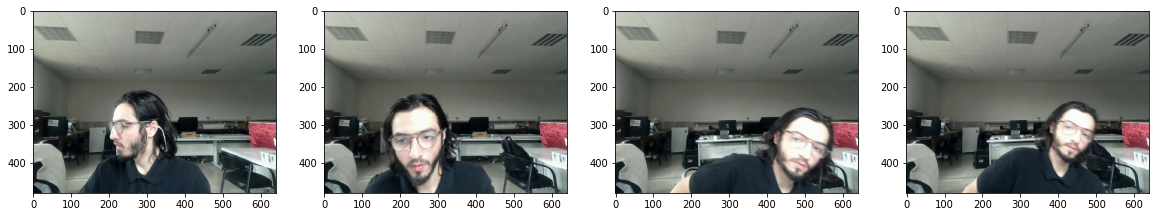

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### partitioning unaugmented data (manually)

In [32]:
114*.7 # 80 to train

79.8

In [36]:
114*.15 # 17 to test and 17 to val

17.099999999999998

### Move the matching Labels

In [37]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)    

### apply image augmetation

In [38]:
import albumentations as alb

In [39]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [42]:
img = cv2.imread(os.path.join('data','train','images','1a667aaa-714f-11ed-aca8-9c5c8e901391.jpg'))

In [44]:
with open(os.path.join('data', 'train', 'labels', '1a667aaa-714f-11ed-aca8-9c5c8e901391.json'), 'r') as f:
    label = json.load(f)


In [46]:
label['shapes'][0]['points']

[[288.9655172413793, 251.08374384236453],
 [376.6502463054187, 376.2068965517241]]

### extract Coordinates

In [47]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [48]:
coords

[288.9655172413793, 251.08374384236453, 376.6502463054187, 376.2068965517241]

In [49]:
coords = list(np.divide(coords, [640,480,640,480]))

In [50]:
coords

[0.45150862068965514,
 0.523091133004926,
 0.5885160098522167,
 0.7837643678160919]

### apply augmentation 

In [51]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [52]:
augmented['bboxes'][0][2:]

(0.7178544061302683, 0.4709250136836345)

In [53]:
augmented['bboxes']

[(0.5229994526546251,
  0.19287356321839078,
  0.7178544061302683,
  0.4709250136836345)]

In [54]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

array([[[103, 100,  86],
        [ 97,  94,  80],
        [ 97,  94,  80],
        ...,
        [127, 123, 105],
        [129, 125, 108],
        [128, 125, 111]],

       [[106, 100,  87],
        [ 99,  93,  80],
        [100,  94,  83],
        ...,
        [131, 127, 109],
        [131, 127, 110],
        [129, 126, 112]],

       [[102,  96,  83],
        [105,  97,  84],
        [101,  92,  82],
        ...,
        [132, 125, 109],
        [128, 125, 111],
        [130, 129, 116]],

       ...,

       [[167, 171, 166],
        [167, 171, 166],
        [167, 171, 166],
        ...,
        [212, 218, 217],
        [213, 220, 217],
        [213, 220, 217]],

       [[167, 171, 166],
        [167, 171, 166],
        [168, 172, 167],
        ...,
        [212, 218, 217],
        [213, 220, 217],
        [213, 220, 217]],

       [[167, 171, 166],
        [168, 172, 167],
        [168, 172, 167],
        ...,
        [213, 219, 218],
        [213, 220, 217],
        [213, 220, 217]]

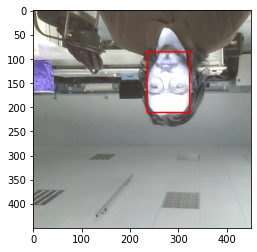

In [55]:
plt.imshow(augmented['image'])

### build and run augmentation pipeline

In [56]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

y_max is less than or equal to y_min for bbox [0.25831280788177347, 0.7601600985221674, 0.3783866995073892, 0.5836412151067323, 'face'].
y_max is less than or equal to y_min for bbox [0.21443965517241387, 0.8361042692939245, 0.3729987684729065, 0.5867200328407224, 'face'].
y_max is less than or equal to y_min for bbox [0.45073891625615764, 0.7632389162561576, 0.6108374384236454, 0.4861453201970443, 'face'].
y_max is less than or equal to y_min for bbox [0.16517857142857154, 0.8289203612479474, 0.3352832512315272, 0.5333538587848933, 'face'].
y_max is less than or equal to y_min for bbox [0.4299568965517242, 0.7878694581280787, 0.5608066502463055, 0.5425903119868637, 'face'].
y_max is less than or equal to y_min for bbox [0.3691502463054188, 0.7827380952380951, 0.5215517241379312, 0.5015394088669951, 'face'].
y_max is less than or equal to y_min for bbox [0.666256157635468, 0.8956280788177339, 0.794027093596059, 0.6708743842364532, 'face'].
y_max is less than or equal to y_min for bbox 

y_max is less than or equal to y_min for bbox [0.44073275862068967, 0.7888957307060754, 0.5969827586206897, 0.5189860426929392, 'face'].
y_max is less than or equal to y_min for bbox [0.48845443349753703, 0.7919745484400657, 0.6023706896551724, 0.5118021346469622, 'face'].
y_max is less than or equal to y_min for bbox [0.403786945812808, 0.6913998357963874, 0.5492610837438423, 0.451252052545156, 'face'].
y_max is less than or equal to y_min for bbox [0.12207512315270944, 0.8207101806239737, 0.2336822660098523, 0.5682471264367817, 'face'].
y_max is less than or equal to y_min for bbox [0.4130233990147783, 0.7827380952380951, 0.5484913793103449, 0.5477216748768472, 'face'].
y_max is less than or equal to y_min for bbox [0.19365763546798037, 0.8073686371100164, 0.352216748768473, 0.527196223316913, 'face'].
y_max is less than or equal to y_min for bbox [0.38993226600985226, 0.8032635467980296, 0.5423337438423645, 0.5148809523809523, 'face'].
y_max is less than or equal to y_min for bbox [

### load augmented images to tf dataset

In [58]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [59]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [60]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [61]:
train_images.as_numpy_iterator().next()

array([[[0.00000000e+00, 2.99019609e-02, 5.73529415e-02],
        [1.28676475e-03, 3.93995084e-02, 6.42156899e-02],
        [1.83823533e-04, 3.67647074e-02, 6.02941178e-02],
        ...,
        [1.00000001e-01, 1.50980398e-01, 1.86274514e-01],
        [9.52818617e-02, 1.42340690e-01, 1.89399511e-01],
        [1.01960786e-01, 1.53921574e-01, 1.95465684e-01]],

       [[0.00000000e+00, 2.05882359e-02, 5.13480380e-02],
        [2.81862752e-03, 3.72549035e-02, 6.51348010e-02],
        [2.80637257e-02, 6.72794133e-02, 1.02573529e-01],
        ...,
        [8.97671580e-02, 1.36825979e-01, 1.83884799e-01],
        [9.50367674e-02, 1.42095596e-01, 1.89154416e-01],
        [1.03615195e-01, 1.55575976e-01, 2.00183824e-01]],

       [[0.00000000e+00, 7.23039219e-03, 3.07598040e-02],
        [2.53063720e-02, 5.93137257e-02, 8.71936306e-02],
        [3.47365201e-01, 3.90502453e-01, 4.14031863e-01],
        ...,
        [9.80392173e-02, 1.45098045e-01, 1.92156866e-01],
        [9.71200988e-02, 1.44

### prepare labels

In [62]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### Load labels to Tensorflow Dataset

In [64]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [65]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [66]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [67]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

### Combine labels and image samples

In [68]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(540, 540, 120, 120, 180, 180)

In [69]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [70]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [71]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [73]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.684 , 0.0551, 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.3503, 0.7573, 0.6436, 1.    ],
        [0.9873, 0.    , 1.    , 0.278 ]], dtype=float16))

In [74]:
data_samples = train.as_numpy_iterator()

In [75]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


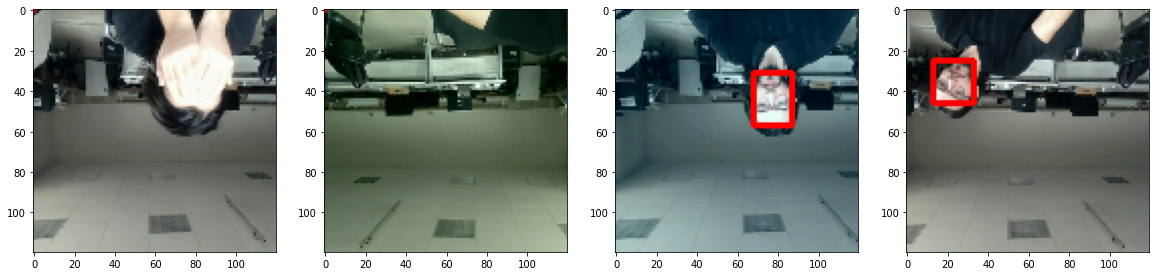

In [76]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)



# Build Deep learning using API

### import dependencies

In [77]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### Download pretrained VGG16 model

In [78]:
vgg = VGG16(include_top=False)

In [79]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### build instance-Net

In [86]:
def build_model():
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top = False)(input_layer)
    
    #classification model
    
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048,activation='relu')(f1)
    class2 = Dense(1 , activation='sigmoid')(class1)
    
    #bounding box estimation model
    
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048,activation = 'relu')(f2)
    resgress2 = Dense(4 , activation = 'sigmoid')(regress1)
    
    facetracker = Model(inputs = input_layer , outputs=[class2,resgress2])
    return facetracker

### test neurak network

In [87]:
facetracker = build_model()

In [88]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_6[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_4 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                                

In [90]:
X, y = train.as_numpy_iterator().next()

In [91]:
X.shape

(8, 120, 120, 3)

In [94]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 227ms/step


In [95]:
classes, coords

(array([[0.66230756],
        [0.660637  ],
        [0.70008117],
        [0.6307224 ],
        [0.6467742 ],
        [0.69357854],
        [0.6442974 ],
        [0.65832686]], dtype=float32),
 array([[0.57842016, 0.55263436, 0.4006941 , 0.509349  ],
        [0.52801466, 0.6142353 , 0.4114575 , 0.4944873 ],
        [0.55947036, 0.577358  , 0.36084783, 0.44724151],
        [0.55789256, 0.6256025 , 0.43679968, 0.44724005],
        [0.5524502 , 0.5471038 , 0.41075554, 0.4627043 ],
        [0.5666988 , 0.6678149 , 0.35208115, 0.44589752],
        [0.59840184, 0.5183972 , 0.39785382, 0.5086239 ],
        [0.49630985, 0.6372781 , 0.35258698, 0.41735083]], dtype=float32))

# Define Losses and Optimizers

### define optimizer and LR

In [96]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [97]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### create localization loss and classification loss

In [99]:
def localization_loss(y_true ,yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [100]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### test loss metrics 

In [102]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0398393>

In [103]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5691541>

In [104]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0398393>

# Train Neural Network

### Create custom model class

In [105]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [106]:
model = FaceTracker(facetracker)

In [107]:
model.compile(opt, classloss, regressloss)

### Train

In [108]:
logdir='logs'

In [109]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [110]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
68/68 [==============================] - 72s 1s/step - total_loss: 1.5160 - class_loss: 0.6063 - regress_loss: 1.2129 - val_total_loss: 0.8564 - val_class_loss: 0.9268 - val_regress_loss: 0.3930
Epoch 2/10
68/68 [==============================] - 70s 1s/step - total_loss: 0.4401 - class_loss: 0.1378 - regress_loss: 0.3712 - val_total_loss: 1.4944 - val_class_loss: 1.7562 - val_regress_loss: 0.6163
Epoch 3/10
68/68 [==============================] - 70s 1s/step - total_loss: 0.1350 - class_loss: 0.0361 - regress_loss: 0.1170 - val_total_loss: 1.5386 - val_class_loss: 2.7632 - val_regress_loss: 0.1570
Epoch 4/10
68/68 [==============================] - 70s 1s/step - total_loss: 0.0361 - class_loss: 0.0038 - regress_loss: 0.0341 - val_total_loss: 0.0012 - val_class_loss: 0.0013 - val_regress_loss: 5.6059e-04
Epoch 5/10
68/68 [==============================] - 70s 1s/step - total_loss: 0.0603 - class_loss: 0.0146 - regress_loss: 0.0530 - val_total_loss: 0.0067 - val_class_loss: 

### plot performance 

In [111]:
hist.history

{'total_loss': [0.7572981715202332,
  0.06063370779156685,
  0.02244073897600174,
  0.05607110634446144,
  0.03199770674109459,
  0.005519663915038109,
  0.02506325952708721,
  0.005369535647332668,
  0.002791458973661065,
  0.001277397619560361],
 'class_loss': [0.5310734510421753,
  0.002367782173678279,
  0.007663412485271692,
  0.001656695967540145,
  4.05312493967358e-06,
  0.0003015991533175111,
  0.001054101623594761,
  0.00012230087304487824,
  0.0001301127631450072,
  0.00010780521552078426],
 'regress_loss': [0.4917614459991455,
  0.05944981798529625,
  0.018609032034873962,
  0.05524275824427605,
  0.031995680183172226,
  0.0053688641637563705,
  0.02453620918095112,
  0.005308385007083416,
  0.002726402599364519,
  0.0012234949972480536],
 'val_total_loss': [0.8564132452011108,
  1.4944084882736206,
  1.5385863780975342,
  0.0012215850874781609,
  0.0066559286788105965,
  3.594968795776367,
  0.00041351281106472015,
  2.1392807960510254,
  2.479692220687866,
  6.18615531921

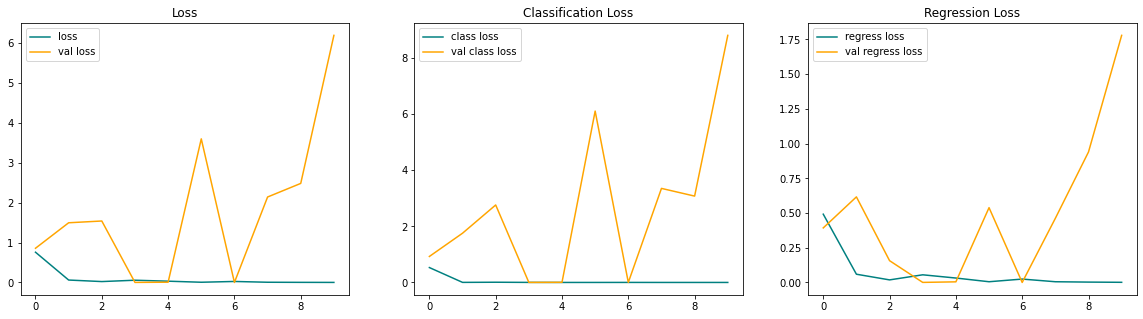

In [112]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()


# make predictions

In [133]:
test_data = test.as_numpy_iterator()

In [134]:
test_sample = test_data.next()

In [135]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 205ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


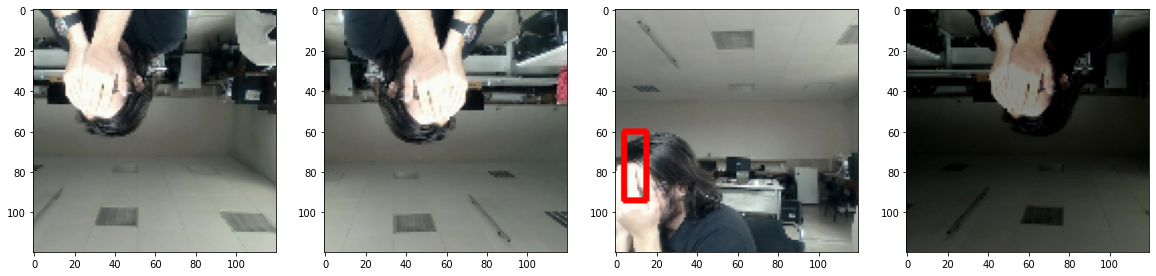

In [136]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### save the model

In [137]:
from tensorflow.keras.models import load_model

In [138]:
facetracker.save('facetracker.h5')

In [139]:
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'frame', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
